## Imports

In [1]:
# To embed plots in the notebooks
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np # numpy library
import scipy.io
from scipy.spatial import distance # load distance function
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold

# seaborn can be used to "prettify" default matplotlib plots by importing and setting as default
import seaborn as sns
sns.set() # Set searborn as default

# load dataset

In [2]:
mat = scipy.io.loadmat('Silhouettes.mat')
Fem = mat['Fem'].ravel() - 1 # Get rid of outer dim, -1 due to stupid matlab indexing
Male = mat['Male'].ravel() - 1
Xa = mat['Xa']

## 2 Perform model selection for KNN classification (for the silhouette data):
> (a) Load the dataset and plot the silhouettes.


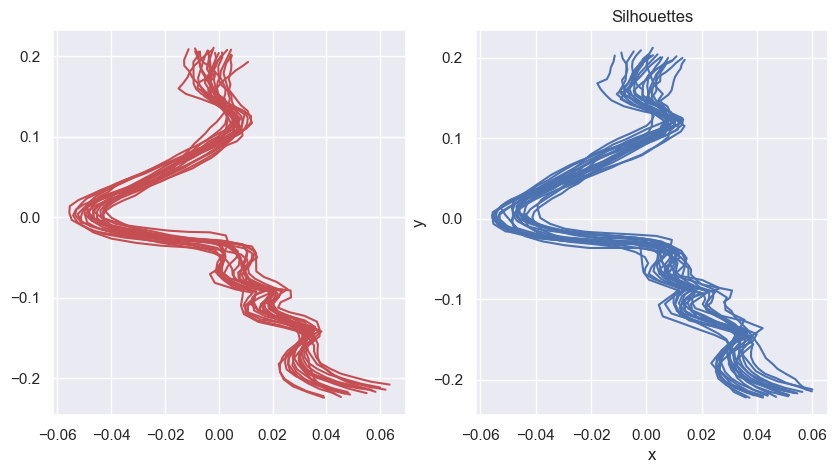

In [8]:
# Create a plot of the female and male silhouettes. 
#Hint: x-values are in the first 65 columns and y-valies are in the last 65 columns
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(Xa[Fem,:65].T, Xa[Fem,65:].T, 'r')
plt.subplot(1,2,2)
plt.plot(Xa[Male,:65].T, Xa[Male,65:].T, 'b')
plt.title('Silhouettes')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

>(b) What size of fold would you use for cross-validation for the silhouette data set? Why?

**We have very few observations(39), and therefore small size, perhaps leave one out**

>(c) Select a suitable number K for KNN classification on the silhouette profiles data using leave-one-out cross-validation.

[0.44736842 0.35526316 0.30263158 0.36842105 0.28947368 0.42105263
 0.40789474 0.40789474 0.43421053]


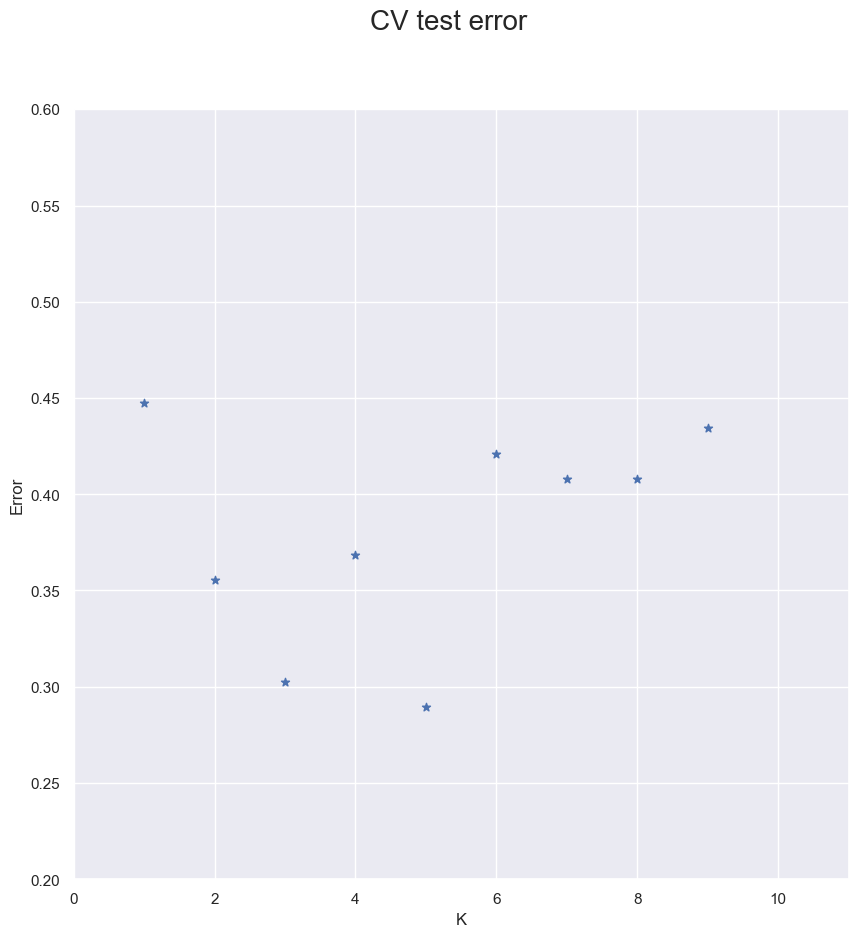

In [43]:
#Setup a response vector
N = np.shape(Xa)[0]
y = np.zeros(N)
y[Fem] = 1
n_classes = 2

#Hint: x-values are in the first 65 columns and y-valies are in the last 65 columns

# For a suitable number create K chunks of the data. Hint: feel fre to use sklearns "KFold"
K = 38
Ksplit = KFold(n_splits=K, shuffle=True, random_state=42)

# select a range of k neighbours
k_neigh = 10
Error = np.zeros((K, k_neigh-1))

# run KNN with the entire range og k neighbours on all K chunks of the data
# Feel free to use Scikit KNN classifier, as you have already tried implementing it youself
KNN = KNeighborsClassifier(n_neighbors=k_neigh)
# calculate the mse across folds. You can also use the mae if the mse errors are almost the same

for i, (train_index, test_index) in enumerate(Ksplit.split(Xa)):
    X_train, X_test = Xa[train_index], Xa[test_index]
    y_train, y_test = y[train_index], y[test_index]
    for k in range(1,k_neigh):
        KNN.n_neighbors = k
        KNN.fit(X_train, y_train)
        y_pred = KNN.predict(X_test)
        Error[i,k-1] = np.mean(y_pred != y_test)

# Plot the error for each number of neighbours
E = np.mean(Error, axis = 0)
print(E)
fig  = plt.figure(figsize=(10,10))
plt.scatter(list(range(1,k_neigh)), E, marker = '*')
plt.axis([0, 11, 0.2, 0.6])
fig.suptitle("CV test error", fontsize=20)
plt.xlabel("K")
plt.ylabel("Error")
plt.show()